In [2]:
from scipy import misc, ndimage
import numpy as np
import matplotlib.pyplot as plt


/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_20282/1636031291.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


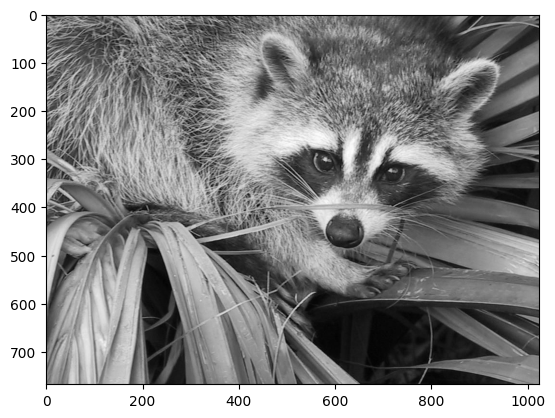

In [15]:
X = misc.face(gray=True)
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata Fourier a unei imagini

Transformata Fourier Discretă se extinde ușor la mai multe dimensiuni. Pentru un semnal bidimensional precum o imagine DFT devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x_{n_1,n_2}e^{-j2\pi(m_1 n_1/N_1 + m_2 n_2/N_2)}
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric
* proprietățile transformatei DFT 1D sunt respectate și în cazul celei 2D

În continuare vom folosi rutina generală `fft2` ce servește mai bine activității de învățare, deși pentru semnale reale ar trebui să folosim `rfft2` ce întoarce doar informația esențială (ex. omite simetriile). De asemenea vom analiza spectrul în scală logaritmică pentru a diferenția mai bine magnitudinile bin-urilor DTF.

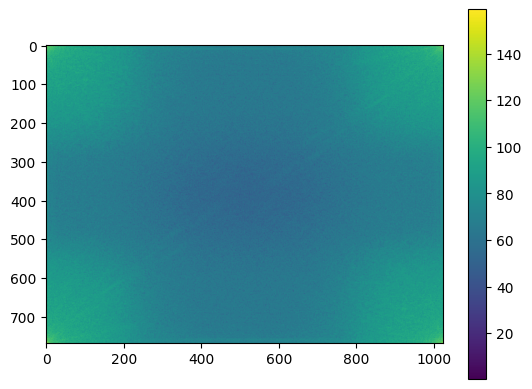

In [4]:
Y = np.fft.fft2(X)
freq_db = 20 * np.log10(np.abs(Y))

plt.imshow(freq_db)
plt.colorbar()
plt.show()


Operațiile efectuate direct asupra imaginii se reflectă și în spectrul acesteia. Iată un exemplu a unei rotații de 45 de grade:

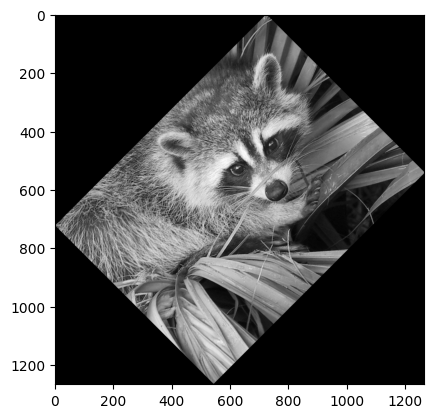

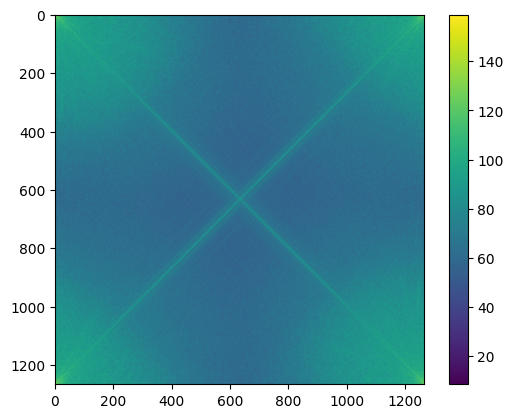

In [5]:
rotate_angle = 45
X45 = ndimage.rotate(X, rotate_angle)
plt.imshow(X45, cmap=plt.cm.gray)
plt.show()

Y45 = np.fft.fft2(X45)
plt.imshow(20*np.log10(abs(Y45)))
plt.colorbar()
plt.show()


Momentan pe axe sunt afișate numărul bin-urilor. Pentru a obține frecvențele asociate folosiți `fftfreq`:

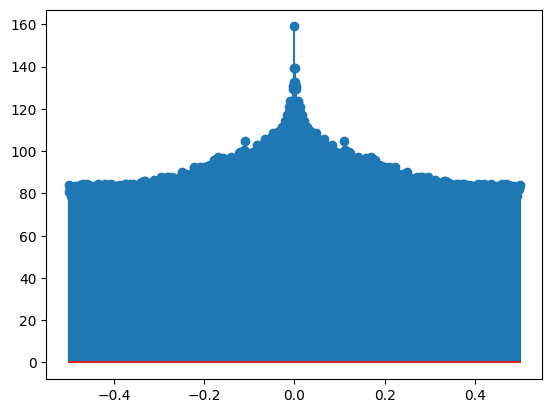

In [6]:
freq_x = np.fft.fftfreq(X.shape[1])
freq_y = np.fft.fftfreq(X.shape[0])

plt.stem(freq_x, freq_db[:][0])
plt.show()

# Atenuarea frecvențelor înalte

Pentru a anula frecvențele de peste un anumit prag `freq_cutoff` putem pur și simplu anula intrările din spectru și aplica transformata Fourier inversă:

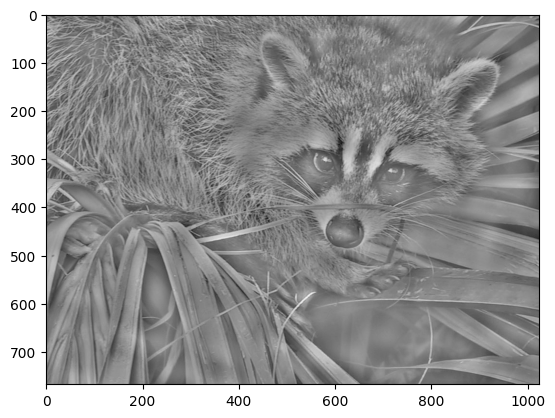

In [11]:
freq_cutoff = 120

Y_cutoff = Y.copy()
Y_cutoff[freq_db > freq_cutoff] = 0
X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()


# Zgomot

Zgomotul alb perturbă în mod egal spectrul semnalului. Este astfel egal distribuit și regăsit în toate bin-urile DFT. [Zgomotul color](https://en.wikipedia.org/wiki/Colors_of_noise) se schimbă de-a lungul frecvențelor.

Putem adăuga zgomot în limita a `pixel_noise` pixeli imaginii folosind `random.randint`:

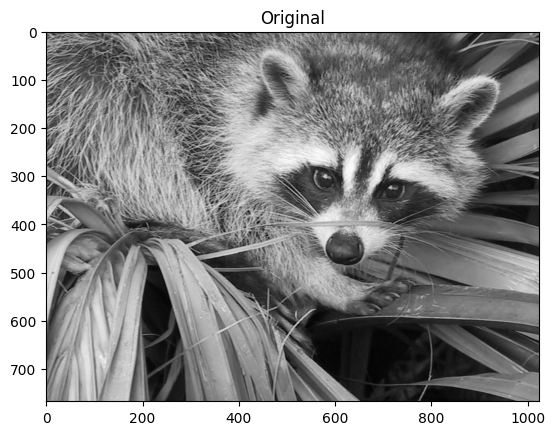

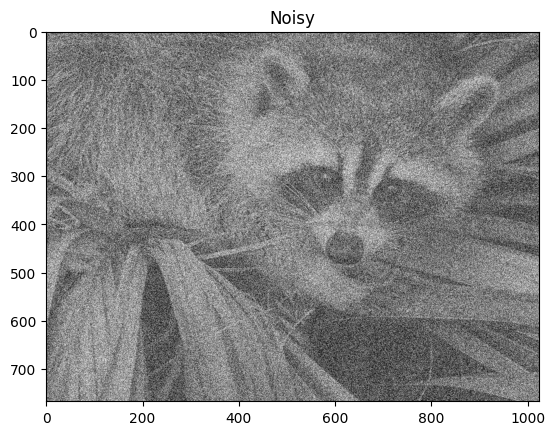

In [20]:
pixel_noise = 200

noise = np.random.randint(-pixel_noise, high=pixel_noise+1, size=X.shape)
X_noisy = X + noise
plt.imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.show()
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()


# Sarcini

1. [8p] Produceți imaginile și spectrul pentru funcțiile de mai jos și dați o explicație scurtă pentru fiecare rezultat.
* $x_{n_1,n_2} = \sin(2\pi n_1 + 3\pi n_2)$
* $x_{n_1,n_2} = \sin(4\pi n_1) + \cos(6\pi n_2)$
* $Y_{0,5} = Y_{0,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,0} = Y_{N-5,0} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$
* $Y_{5,5} = Y_{N-5,N-5} = 1\text{, altfel }Y_{m_1,m_2} = 0,\ \forall m_1, m_2$

*Atenție*: $x$ reprezintă informație în domeniul timpului, $Y$ în domeninul frecvenței.

2. [4p] Comprimați imaginea cu ratonul de mai sus prin atenuarea frecvențelor înalte până la un prag SNR autoimpus.

3. [4p] Eliminați zgomotul adăugat la imaginea cu ratonul produsă mai sus. Prezentați raportul SNR înainte și după.

4. [4p] Alegeți o secvență scurtă de timp (ex. 5-10 secunde) și eliminați un instrument la alegere din semnalul audio rezultat în urma rezolvării sarcinilor de la [laboratorul 5](https://cs.unibuc.ro/~pirofti/ps/ps-lab-5.pdf).

In [51]:
N: int = 100

t1 = np.linspace(0, 1, N)
t2 = np.linspace(0, 1, N)


def sin(n1: int, n2: int):
    return np.sin(2 * np.pi * n1 + 3 * np.pi * n2)


image = np.empty((N, N))

for i, a in enumerate(t1):
    for j, b in enumerate(t2):
        image[i][j] = sin(a, b)

X1 =  np.fft.fft2(image)
freq_db = 20 * np.log10(np.abs(X1))

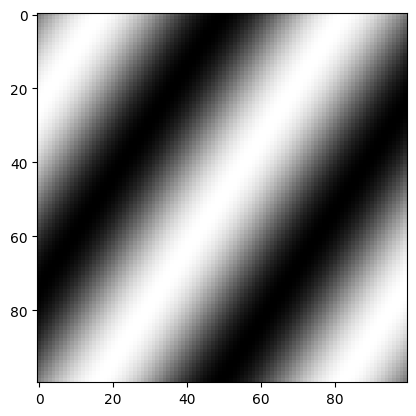

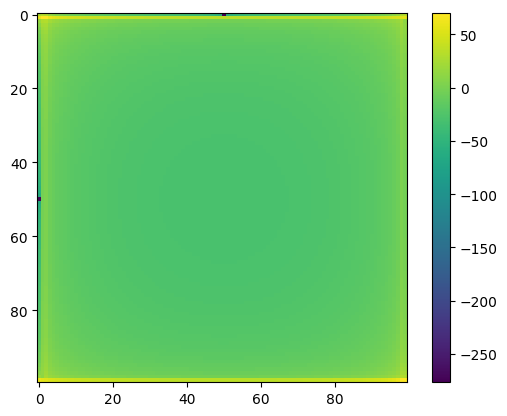

In [52]:
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

plt.imshow(freq_db)
plt.colorbar()
plt.show()

In [54]:
N: int = 40

t1 = np.linspace(0, 1, N)
t2 = np.linspace(0, 1, N)


def sin(n1: int, n2: int):
    return np.sin(4 * np.pi * n1) + np.cos(6 * np.pi * n2)


image = np.empty((N, N))

for i, a in enumerate(t1):
    for j, b in enumerate(t2):
        image[i][j] = sin(a, b)

X1 =  np.fft.fft2(image)
freq_db = 20*np.log10(np.abs(X1))

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_19979/3153332041.py:18: RuntimeWarning: divide by zero encountered in log10
  freq_db = 20*np.log10(np.abs(X1))


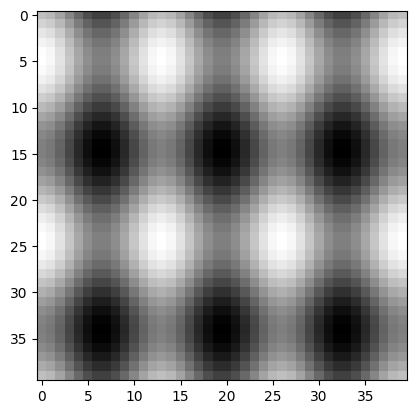

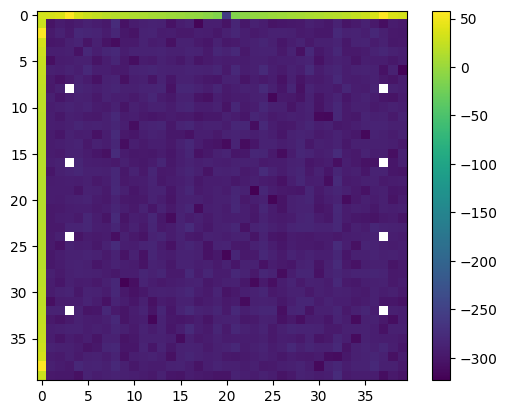

In [55]:
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

plt.imshow(freq_db)
plt.colorbar()
plt.show()

In [57]:
N: int = 50

Y = np.zeros((N, N))

Y[0][5] = Y[0][N - 5] = 1

X = np.abs(np.fft.ifft2(Y))

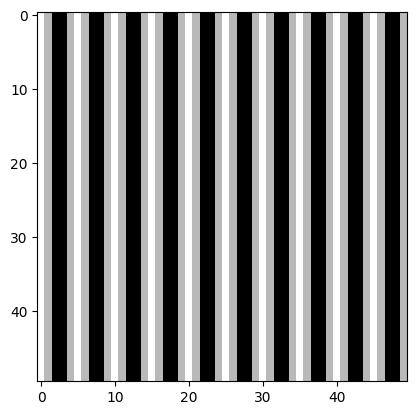

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_19979/1775901568.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(abs(Y)))


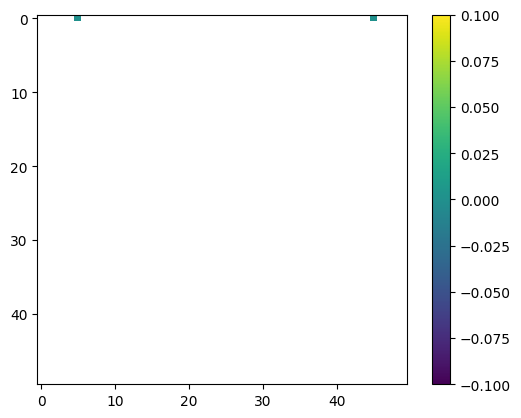

In [61]:
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

plt.imshow(20*np.log10(abs(Y)))
plt.colorbar()
plt.show()

In [62]:
N: int = 50

Y = np.zeros((N, N))

Y[5][0] = Y[N - 5][0] = 1

X = np.abs(np.fft.ifft2(Y))

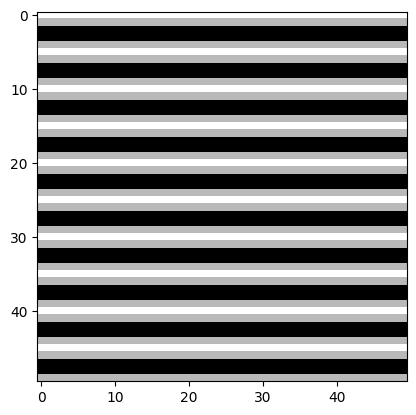

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_19979/2010169651.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(abs(Y)))


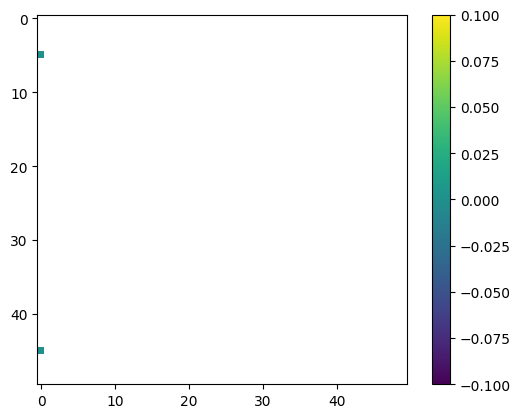

In [63]:
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

plt.imshow(20*np.log10(abs(Y)))
plt.colorbar()
plt.show()

In [64]:
N: int = 50

Y = np.zeros((N, N))

Y[5][5] = Y[N - 5][N - 5] = 1

X = np.abs(np.fft.ifft2(Y))

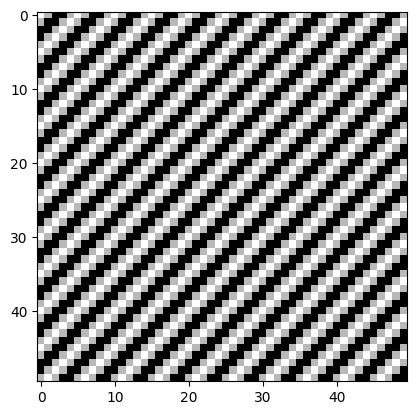

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_19979/2010169651.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(20*np.log10(abs(Y)))


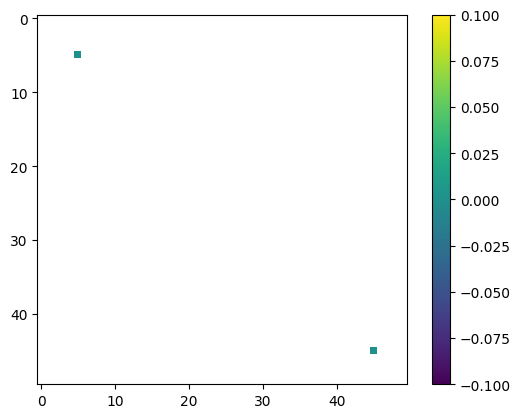

In [65]:
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

plt.imshow(20*np.log10(abs(Y)))
plt.colorbar()
plt.show()

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_20282/132517250.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  X = misc.face(gray=True)


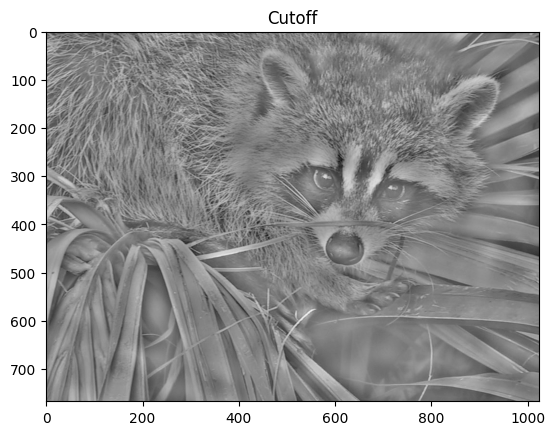

In [18]:
X = misc.face(gray=True)

Y = np.fft.fft2(X)
freq_db = 20 * np.log10(np.abs(Y))

Y_cutoff = np.copy(Y)

freq_cutoff = 120

Y_cutoff[freq_db > freq_cutoff] = 0

# for i, row in enumerate(Y_cutoff):
#     for j, elem in enumerate(row):
#         if elem > freq_cutoff:
#             Y_cutoff[i][j] = 0


X_cutoff = np.fft.ifft2(Y_cutoff)
X_cutoff = np.real(X_cutoff)    # avoid rounding erros in the complex domain,
                                # in practice use irfft2

plt.title('Cutoff')
plt.imshow(X_cutoff, cmap=plt.cm.gray)
plt.show()

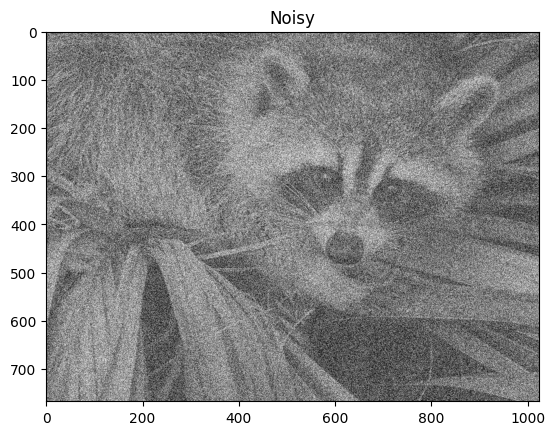

In [21]:
plt.imshow(X_noisy, cmap=plt.cm.gray)
plt.title('Noisy')
plt.show()